In [1]:
%pylab inline
from constantLowSkill3_cost100 import * 

Populating the interactive namespace from numpy and matplotlib


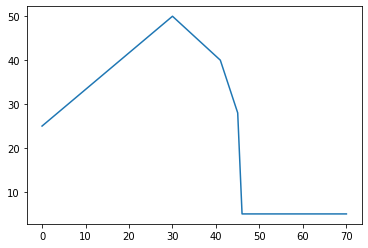

In [2]:
plt.plot(detEarning)

In [3]:
Vgrid = np.load("LowSkillWorker3_fineGrid_cost100.npy")
gamma

6

In [4]:
num = 10000
'''
    x = [w,n,m,s,e,o,z]
    x = [5,0,0,0,0,0,0]
'''

from jax import random

def simulation(key):
    initE = random.choice(a = nE, p=E_distribution, key = key)
    initS = random.choice(a = nS, p=S_distribution, key = key)
    x = [5, 0, 0, initS, initE, 0, 0]
    path = []
    move = []
    for t in range(T_min, T_max):
        _, key = random.split(key)
        if t == T_max-1:
            _,a = V(t,Vgrid[:,:,:,:,:,:,:,t],x)
        else:
            _,a = V(t,Vgrid[:,:,:,:,:,:,:,t+1],x)
        xp = transition(t,a.reshape((1,-1)),x)
        p = xp[:,-1]
        x_next = xp[:,:-1]
        path.append(x)
        move.append(a)
        x = x_next[random.choice(a = nS*nE, p=p, key = key)]
    path.append(x)
    return jnp.array(path), jnp.array(move)

In [5]:
%%time
# simulation part 
keys = vmap(random.PRNGKey)(jnp.arange(num))
Paths, Moves = vmap(simulation)(keys)

CPU times: user 9h 58min 59s, sys: 52min 15s, total: 10h 51min 15s
Wall time: 28min 46s


In [6]:
# x = [w,n,m,s,e,o,z]
# x = [0,1,2,3,4,5,6]
ws = Paths[:,:,0].T
ns = Paths[:,:,1].T
ms = Paths[:,:,2].T
ss = Paths[:,:,3].T
es = Paths[:,:,4].T
os = Paths[:,:,5].T
zs = Paths[:,:,6].T
cs = Moves[:,:,0].T
bs = Moves[:,:,1].T
ks = Moves[:,:,2].T
hs = Moves[:,:,3].T
actions = Moves[:,:,4].T

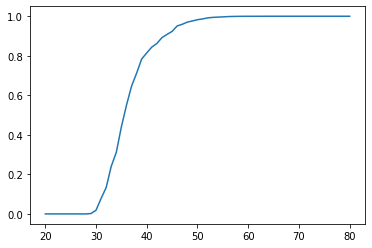

In [7]:
plt.plot(range(20, T_max + 21),jnp.mean(zs,axis = 1), label = "experience")

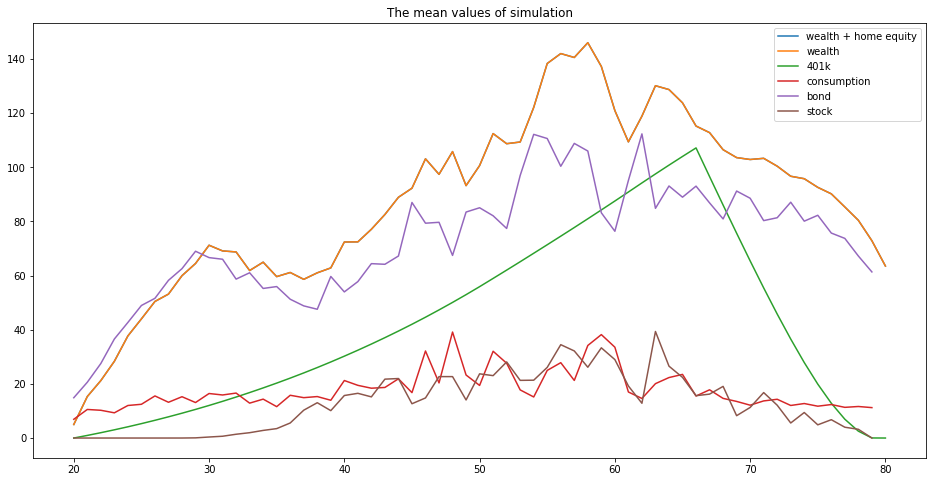

In [30]:
plt.figure(figsize = [16,8])
plt.title("The mean values of simulation")
plt.plot(range(20, T_max + 21),jnp.mean(ws + H*pt*os - ms,axis = 1), label = "wealth + home equity")
plt.plot(range(20, T_max + 21),jnp.mean(ws,axis = 1), label = "wealth")
plt.plot(range(20, T_max + 21),jnp.mean(ns,axis = 1), label = "401k")
plt.plot(range(20, T_max + 20),jnp.mean(cs,axis = 1), label = "consumption")
plt.plot(range(20, T_max + 20),jnp.mean(bs,axis = 1), label = "bond")
plt.plot(range(20, T_max + 20),jnp.mean(ks,axis = 1), label = "stock")
plt.legend()

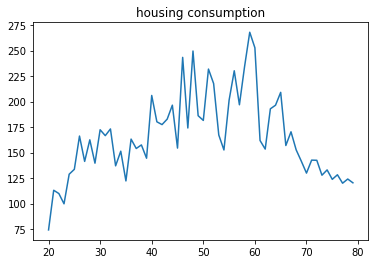

In [9]:
plt.title("housing consumption")
plt.plot(range(20, T_max + 20),(hs).mean(axis = 1), label = "housing")

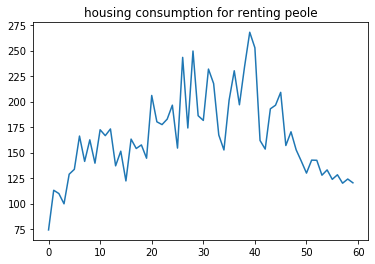

In [10]:
plt.title("housing consumption for renting peole")
plt.plot(hs[:, jnp.where(os.sum(axis = 0)  == 0)[0]].mean(axis = 1), label = "housing")

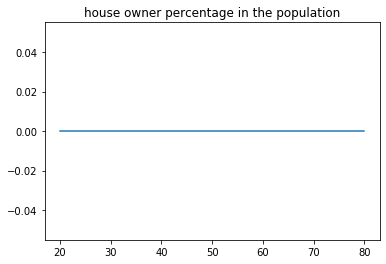

In [11]:
plt.title("house owner percentage in the population")
plt.plot(range(20, T_max + 21),(os).mean(axis = 1), label = "owning")

In [12]:
jnp.where(os[T_max - 1, :] == 0)

(DeviceArray([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int32),)

In [13]:
Ps

DeviceArray([[1.7518225e-01, 6.1808067e-04, 5.5164091e-05, 1.9463076e-07,
              8.2098824e-01, 2.8966228e-03, 2.5852543e-04, 9.1213326e-07],
             [1.6759914e-01, 1.2952678e-01, 2.5341161e-02, 1.9584583e-02,
              3.2238281e-01, 2.4914929e-01, 4.8744611e-02, 3.7671629e-02],
             [2.6980927e-02, 2.0851500e-04, 3.1347638e-01, 2.4226198e-03,
              5.1660389e-02, 3.9924373e-04, 6.0021335e-01, 4.6385908e-03],
             [2.6051302e-05, 3.1040843e-05, 2.4998195e-01, 2.9786035e-01,
              2.1496298e-05, 2.5613430e-05, 2.0627324e-01, 2.4578024e-01],
             [2.4578024e-01, 2.0627324e-01, 2.5613430e-05, 2.1496298e-05,
              2.9786035e-01, 2.4998195e-01, 3.1040843e-05, 2.6051302e-05],
             [4.6385908e-03, 6.0021335e-01, 3.9924373e-04, 5.1660389e-02,
              2.4226198e-03, 3.1347638e-01, 2.0851500e-04, 2.6980927e-02],
             [3.7671629e-02, 4.8744611e-02, 2.4914929e-01, 3.2238281e-01,
              1.9584583e-02, 2.5

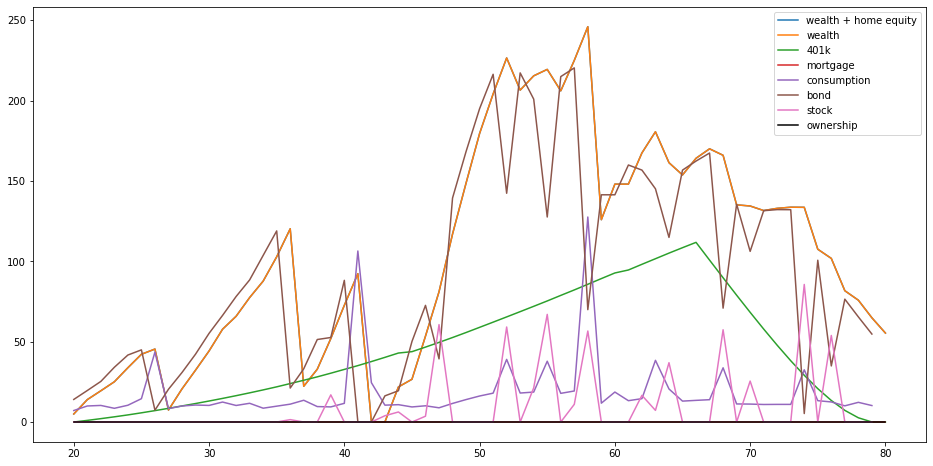

In [14]:
# agent number, x = [w,n,m,s,e,o]
agentNum = 35
plt.figure(figsize = [16,8])
plt.plot(range(20, T_max + 21),(ws + os*(H*pt - ms))[:,agentNum], label = "wealth + home equity")
plt.plot(range(20, T_max + 21),ws[:,agentNum], label = "wealth")
plt.plot(range(20, T_max + 21),ns[:,agentNum], label = "401k")
plt.plot(range(20, T_max + 21),ms[:,agentNum], label = "mortgage")
plt.plot(range(20, T_max + 20),cs[:,agentNum], label = "consumption")
plt.plot(range(20, T_max + 20),bs[:,agentNum], label = "bond")
plt.plot(range(20, T_max + 20),ks[:,agentNum], label = "stock")
plt.plot(range(20, T_max + 21),os[:,agentNum]*100, label = "ownership", color = "k")
plt.legend()

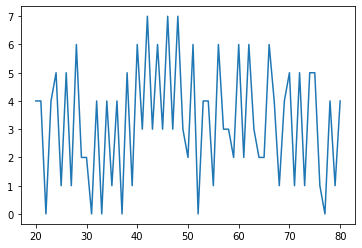

In [15]:
plt.plot(range(20, T_max + 21),ss[:,agentNum], label = "wealth")

In [16]:
states = jnp.array(list(range(8)), dtype = int8)
bondReturn = r_b[states]
bondReturn 

DeviceArray([-0.00841847,  0.01124221,  0.04698699,  0.06664767,
             -0.00841847,  0.01124221,  0.04698699,  0.06664767],            dtype=float32)

In [52]:
expectedStockReturn = jnp.dot(Ps, s)

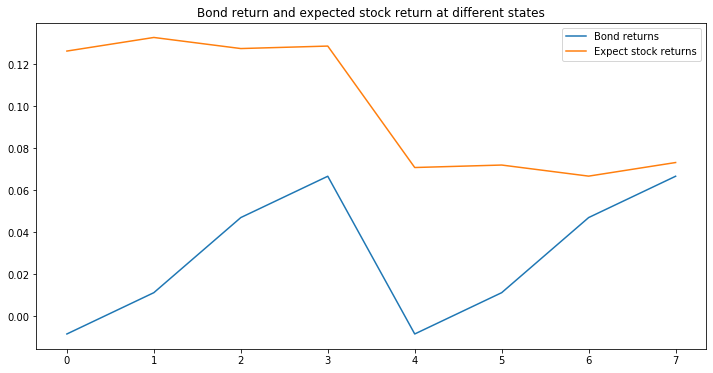

In [53]:
plt.figure(figsize = [12, 6])
plt.title("Bond return and expected stock return at different states")
plt.plot(range(8),bondReturn, label = "Bond returns")
plt.plot(range(8),expectedStockReturn, label = "Expect stock returns")
plt.legend()

In [21]:
import pandas as pd
investmentRatio = np.zeros((nS, T_max))
for age in range(0,T_max):
    stockRatio = ks[age,:] / (ks[age,:] + bs[age,:])
    state = ss[age,:]
    list_of_tuples = list(zip(stockRatio, state)) 
    df = pd.DataFrame(list_of_tuples,columns = ['stockRatio', "econState"]) 
    investmentRatio[:,age] = df.groupby("econState").mean().values.flatten()

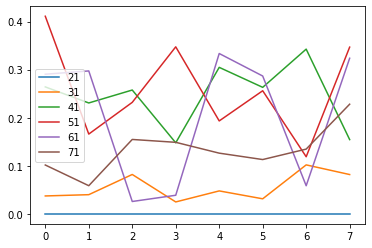

In [22]:
plt.figure()
for age in range(1,T_max-1, 10):
    plt.plot(investmentRatio[:,age],label = str(age + 20))
plt.legend()

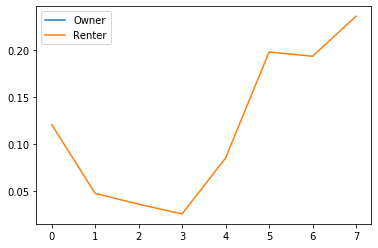

In [23]:
age = 50
stockRatio = ks[age,:] / (ks[age,:] + bs[age,:])
state = ss[age,:]
own = os[age,:]
list_of_tuples = list(zip(stockRatio, state, own)) 
df = pd.DataFrame(list_of_tuples,columns = ['stockRatio', "econState", "own"]) 
owner = df[df["own"] == 1]
renter = df[df["own"] == 0]
plt.plot(owner.groupby("econState")["stockRatio"].mean().values.flatten(), label = "Owner")
plt.plot(renter.groupby("econState")["stockRatio"].mean().values.flatten(), label = "Renter")
plt.legend()

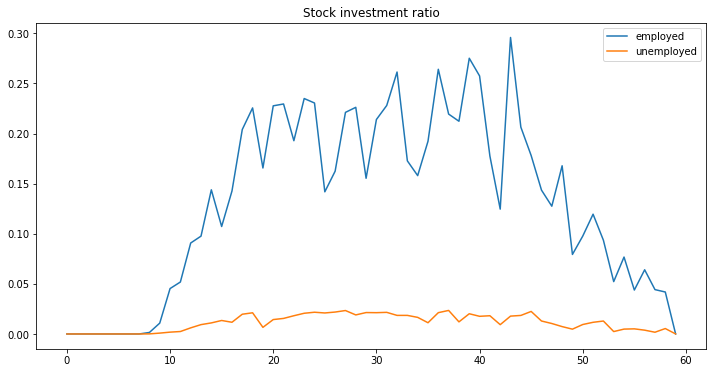

In [24]:
plt.figure(figsize = [12,6])
plt.title("Stock investment ratio")
plt.plot((es[:T_max,:]*(ks/(ks+bs))).mean(axis = 1), label = "employed")
plt.plot(((1-es[:T_max,:])*(ks/(ks+bs))).mean(axis = 1), label = "unemployed")
plt.legend()

In [ ]:
# agent selling time collection
agentTime = []
for t in range(30):
    if ((os[t,:] == 0) & (os[t+1,:] == 1)).sum()>0:
        for agentNum in jnp.where((os[t,:] == 0) & (os[t+1,:] == 1))[0]:
            agentTime.append([t, agentNum])
agentTime = jnp.array(agentTime)

In [ ]:
# agent selling time collection
agentHold = []
for t in range(30):
    if ((os[t,:] == 0) & (os[t+1,:] == 0)).sum()>0:
        for agentNum in jnp.where((os[t,:] == 0) & (os[t+1,:] == 0))[0]:
            agentHold.append([t, agentNum])
agentHold = jnp.array(agentHold)

In [ ]:
plt.title("weath level for buyer and renter")
www = (os*(ws+H*pt - ms)).sum(axis = 1)/(os).sum(axis = 1)
for age in range(30):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    plt.scatter(age, ws[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    plt.scatter(age, www[age], color = "green")
    plt.scatter(age, ws[renter[:,0], renter[:,1]].mean(),color =  "r")

In [ ]:
plt.title("employement status for buyer and renter")
for age in range(31):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    plt.scatter(age, es[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    plt.scatter(age, es[renter[:,0], renter[:,1]].mean(),color =  "r")

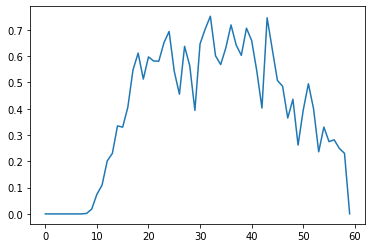

In [27]:
plt.plot((ks>0).mean(axis = 1))

In [ ]:
# At every age
plt.plot((os[:T_max,:]*ks/(ks+bs)).sum(axis = 1)/os[:T_max,:].sum(axis = 1), label = "owner")
plt.plot(((1-os[:T_max,:])*ks/(ks+bs)).sum(axis = 1)/(1-os)[:T_max,:].sum(axis = 1), label = "renter")
plt.legend()

In [ ]:
# At every age
plt.plot((os[:T_max,:]*ks).sum(axis = 1)/os[:T_max,:].sum(axis = 1), label = "owner")
plt.plot(((1-os[:T_max,:])*ks).sum(axis = 1)/(1-os)[:T_max,:].sum(axis = 1), label = "renter")
plt.legend()